### ------------------------------------------------------------------------------------------------------------

In [1]:
import os

import pandas as pd

if 'COLAB_GPU' in os.environ:
    !git clone https://github.com/impulsecorp/PickStocks.git
    !mv PickStocks/*.py .
    !mv PickStocks/data .
    !pip install -U -qq -r PickStocks/requirements.txt

In [2]:
import warnings
warnings.filterwarnings("ignore")
import system
from system import *
# small hack to prevent Colab error
try:
    from datablock import *
except:
    from datablock import *
seed

401258

In [3]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Setup

In [4]:
data_timeperiod = 'D'
data = get_data('SPY', period=data_timeperiod, nrows=None)
data = procdata_lite(data)

Loading.. Done.
Computing features.. Done.


In [5]:
# for inspectiion
print(data.shape)
data.head()

(5885, 95)


,Open,High,Low,Close,Volume,X__adx_14,X__dmp_14,X__dmn_14,X__atrr_14,X__bbl_5_2.0,X__bbm_5_2.0,X__bbu_5_2.0,X__bbb_5_2.0,X__bbp_5_2.0,X__cci_14_0.015,X__cmo_14,X__ldecay_5,X__ema_10,X__entp_10,X__macd_12_26_9,X__macdh_12_26_9,X__macds_12_26_9,X__mom_10,X__natr_14,X__rma_10,X__roc_10,X__rsi_14,X__rsx_14,X__slope_1,X__sma_10,X__stochk_14_3_3,X__stochd_14_3_3,X__stochrsik_14_14_3_3,X__stochrsid_14_14_3_3,X__supert_7_3.0,X__supertd_7_3.0,X__supertl_7_3.0,X__superts_7_3.0,X__willr_14,X__adx_14_lagged,X__dmp_14_lagged,X__dmn_14_lagged,X__atrr_14_lagged,X__bbl_5_2.0_lagged,X__bbm_5_2.0_lagged,X__bbu_5_2.0_lagged,X__bbb_5_2.0_lagged,X__bbp_5_2.0_lagged,X__cci_14_0.015_lagged,X__cmo_14_lagged,X__ldecay_5_lagged,X__ema_10_lagged,X__entp_10_lagged,X__macd_12_26_9_lagged,X__macdh_12_26_9_lagged,X__macds_12_26_9_lagged,X__mom_10_lagged,X__natr_14_lagged,X__rma_10_lagged,X__roc_10_lagged,X__rsi_14_lagged,X__rsx_14_lagged,X__slope_1_lagged,X__sma_10_lagged,X__stochk_14_3_3_lagged,X__stochd_14_3_3_lagged,X__stochrsik_14_14_3_3_lagged,X__stochrsid_14_14_3_3_lagged,X__supert_7_3.0_lagged,X__supertd_7_3.0_lagged,X__supertl_7_3.0_lagged,X__superts_7_3.0_lagged,X__willr_14_lagged,X__day,X__overnight_move,X__open_move,X__high_move,X__low_move,X__close_move,X__last_move,X__last_span,X__times_in_row,X__pmove_2,X__pmove_3,X__pmove_4,X__pmove_5,X__pmove_10,X__overnight_direction,X__yesterday_move,X__f1,X__f2,X__f3,X__f4,X__f5,X__f6
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1999-11-01,136.500000,137.000000,135.562500,135.562500,4006500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,-1.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1999-11-02,135.968704,137.250000,134.593704,134.593704,6516900.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.562500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.562500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000,0.000,0.000000,0.000000,0.0000,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,-1.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
1999-11-03,136.000000,136.375000,135.125000,135.500000,7222300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.362500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.968796,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,-0.531296,-0.531296,0.000,0.000000,0.000000,-0.9375,1.437500,0.0,0.000000,0.00,0.0,0.0,0.0,-1.0,0.9375,1.0,0.0,0.0,0.0,0.0,1.0
1999-11-04,136.750000,137.359299,135.765594,136.531204,7907500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,135.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.906296,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.875092,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.031296,0.031296,0.250,-0.968796,-0.968796,-1.3750,2.656296,1.0,-0.500000,0.00,0.0,0.0,0.0,1.0,1.3750,1.0,0.0,0.0,1.0,0.0,0.0
1999-11-05,138.625000,139.109299,136.781204,137.875000,7431500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,136.531204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031204,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.031204,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.124908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.750000,0.750000,-0.875,0.531296,0.906296,-0.5000,1.250000,2.0,0.781296,0.25,0.0,0.0,0.0,1.0,0.5000,1.0,1.0,0.0,0.0,0.0,0.0


In [6]:
system.train_set_end = 0.75 # percentage point specifying the training set end point (1.0 means all data is training set)
system.val_set_end = 1.0   # percentage point specifying the validation set end point (1.0 means no test set)
system.balance_data = 1
system.scale_data = 1

### ------------------------------------------------------------------------------------------------------------

### Base classifier test

In [7]:
# Train LogisticRegression classifier on train data
clf, scaler = train_classifier(LogisticRegression, data)

Training LogisticRegression ... Data collected.
Class 0 (up): 2348
Class 1 (down): 2348
Class 2 (none): 0


  0%|          | 0/5884 [00:00<?, ?it/s]

Profit factor: 1.02024, Winners: 49.90%, Trades: 1471


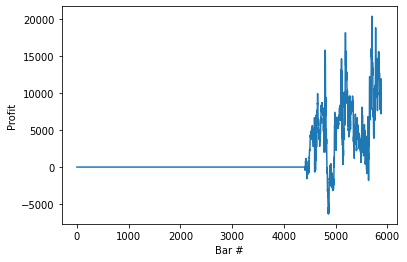

In [8]:
# Test on val data
equity, pf, trades = qbacktest(clf, scaler, data)

In [9]:
trades[0:10]

,pos,pred,shares,entry_datetime,exit_datetime,entry_bar,exit_bar,entry_price,exit_price,profit
0,sell,0.518151,424,2017-05-18,2017-05-18,4414,4414,235.729996,236.770004,-440.963392
1,buy,0.637916,421,2017-05-19,2017-05-19,4415,4415,237.330002,238.309998,412.578316
2,buy,0.573128,418,2017-05-22,2017-05-22,4416,4416,238.899994,239.520004,259.164180
3,buy,0.500001,416,2017-05-23,2017-05-23,4417,4417,239.949997,240.050003,41.602496
4,buy,0.549036,416,2017-05-24,2017-05-24,4418,4418,240.320007,240.610001,120.637504
5,buy,0.531247,414,2017-05-25,2017-05-25,4419,4419,241.199997,241.759995,231.839172
6,buy,0.513391,414,2017-05-26,2017-05-26,4420,4420,241.539993,241.710007,70.385796
7,buy,0.524839,414,2017-05-30,2017-05-30,4421,4421,241.339996,241.500000,66.241656
8,buy,0.599182,413,2017-05-31,2017-05-31,4422,4422,241.839996,241.440002,-165.197522
9,buy,0.605361,413,2017-06-01,2017-06-01,4423,4423,241.970001,243.360001,574.070000


### ------------------------------------------------------------------------------------------------------------

### Neural Network Training

In [10]:
X_train, y_train = get_clean_Xy(data.iloc[0:int(data.shape[0] * system.train_set_end)])
clf = None

In [11]:
clf, scaler = train_classifier(PyTorchClassifierWrapper, data, input_dim=X_train.shape[1], 
                               dropout_prob=0.25, num_layers=3, learning_rate=0.001, 
                               hidden_dim=16, n_epochs=100)

Training PyTorchClassifierWrapper ... Data collected.
Class 0 (up): 2348
Class 1 (down): 2348
Class 2 (none): 0
Epoch 0 - Loss: 0.7064, Accuracy: 0.5009
Epoch 1 - Loss: 0.7013, Accuracy: 0.4981
Epoch 2 - Loss: 0.6975, Accuracy: 0.5181
Epoch 3 - Loss: 0.6957, Accuracy: 0.4981
Epoch 4 - Loss: 0.6950, Accuracy: 0.4977
Epoch 5 - Loss: 0.6967, Accuracy: 0.4940
Epoch 6 - Loss: 0.6939, Accuracy: 0.5011
Epoch 7 - Loss: 0.6944, Accuracy: 0.5094
Epoch 8 - Loss: 0.6939, Accuracy: 0.4985
Epoch 9 - Loss: 0.6933, Accuracy: 0.5053
Epoch 10 - Loss: 0.6933, Accuracy: 0.5064
Epoch 11 - Loss: 0.6930, Accuracy: 0.5085
Epoch 12 - Loss: 0.6930, Accuracy: 0.5062
Epoch 13 - Loss: 0.6922, Accuracy: 0.5126
Epoch 14 - Loss: 0.6918, Accuracy: 0.5264
Epoch 15 - Loss: 0.6921, Accuracy: 0.5260
Epoch 16 - Loss: 0.6917, Accuracy: 0.5219
Epoch 17 - Loss: 0.6899, Accuracy: 0.5292
Epoch 18 - Loss: 0.6916, Accuracy: 0.5170
Epoch 19 - Loss: 0.6908, Accuracy: 0.5256
Epoch 20 - Loss: 0.6895, Accuracy: 0.5332
Epoch 21 - Loss:

  0%|          | 0/5884 [00:00<?, ?it/s]

Profit factor: 1.03560, Winners: 50.92%, Trades: 1471


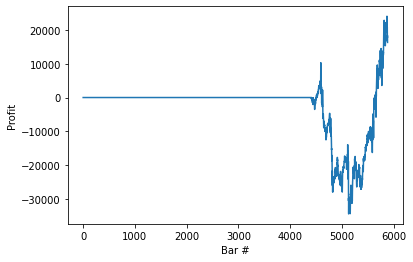

In [12]:
# Test on val data
equity, pf, trades = qbacktest(clf, scaler, data)

In [13]:
trades.head()

,pos,pred,shares,entry_datetime,exit_datetime,entry_bar,exit_bar,entry_price,exit_price,profit
0,sell,0.870283,424,2017-05-18,2017-05-18,4414,4414,235.729996,236.770004,-440.963392
1,buy,0.676475,421,2017-05-19,2017-05-19,4415,4415,237.330002,238.309998,412.578316
2,sell,0.610566,418,2017-05-22,2017-05-22,4416,4416,238.899994,239.520004,-259.164180
3,sell,0.701364,416,2017-05-23,2017-05-23,4417,4417,239.949997,240.050003,-41.602496
4,sell,0.768370,416,2017-05-24,2017-05-24,4418,4418,240.320007,240.610001,-120.637504


### ------------------------------------------------------------------------------------------------------------